Emotion classification and predict Intensity from Tweets

In [1]:
#import basic required libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#text preprocessing libraries
import re
import spacy
from textacy import preprocessing
#import swifter for fast processing
import swifter
#wordcloud for see repeated words
from wordcloud import WordCloud
#import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the anger datset 
df1=pd.read_table(r"C:\Users\hp\Desktop\VS Code\Emotion_Classification\data\Anger.txt",header=None)
df1.head()

,0,1,2,3
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [3]:
#drop unwanted column and rename other columns
df1.drop(columns=0,inplace=True)
df1.rename(columns={1:"Text",2:"Emotion",3:"Intensity"},inplace=True)
df1.head()

,Text,Emotion,Intensity
0,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,So my Indian Uber driver just called someone t...,anger,0.896
2,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
#load the fear datset 
df2=pd.read_table(r"C:\Users\hp\Desktop\VS Code\Emotion_Classification\data\Fear.txt",header=None)
#drop unwanted column and rename other columns
df2.drop(columns=0,inplace=True)
df2.rename(columns={1:"Text",2:"Emotion",3:"Intensity"},inplace=True)
df2.head()

,Text,Emotion,Intensity
0,I feel like I am drowning. #depression #anxiet...,fear,0.979
1,I get so nervous even thinking about talking t...,fear,0.979
2,I lost my blinders .... #panic,fear,0.975
3,I feel like I am drowning. #depression #falur...,fear,0.938
4,This is the scariest American Horror Story out...,fear,0.938


In [5]:
#load the joy datset 
df3=pd.read_table(r"C:\Users\hp\Desktop\VS Code\Emotion_Classification\data\Joy.txt",header=None)
#drop unwanted column and rename other columns
df3.drop(columns=0,inplace=True)
df3.rename(columns={1:"Text",2:"Emotion",3:"Intensity"},inplace=True)
df3.head()

,Text,Emotion,Intensity
0,Just got back from seeing @GaryDelaney in Burs...,joy,0.980
1,Oh dear an evening of absolute hilarity I don'...,joy,0.958
2,Been waiting all week for this game â¤ï¸â¤ï...,joy,0.940
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,0.938
4,I feel so blessed to work with the family that...,joy,0.938


In [6]:
#load the sadness datset 
df4=pd.read_table(r"C:\Users\hp\Desktop\VS Code\Emotion_Classification\data\Sadness.txt",header=None)
#drop unwanted column and rename other columns
df4.drop(columns=0,inplace=True)
df4.rename(columns={1:"Text",2:"Emotion",3:"Intensity"},inplace=True)
df4.head()

,Text,Emotion,Intensity
0,Depression sucks! #depression,sadness,0.958
1,Feeling worthless as always #depression,sadness,0.958
2,Feeling worthless as always,sadness,0.958
3,My #Fibromyalgia has been really bad lately wh...,sadness,0.946
4,Im think ima lay in bed all day and sulk. Life...,sadness,0.934


In [7]:
#concatenating all the dataframes
df=pd.concat([df1,df2,df3,df4],ignore_index=True)
df

,Text,Emotion,Intensity
0,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,So my Indian Uber driver just called someone t...,anger,0.896
2,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...
3955,Common app just randomly logged me out as I wa...,sadness,0.833
3956,"I'd rather laugh with the rarest genius, in be...",sadness,0.688
3957,If you #invest in my new #film I will stop ask...,sadness,0.458
3958,"Just watched Django Unchained, Other people ma...",sadness,0.333


Basic Data Analysis

In [8]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Text       3960 non-null   object 
 1   Emotion    3960 non-null   object 
 2   Intensity  3960 non-null   float64
dtypes: float64(1), object(2)
memory usage: 92.9+ KB


In [9]:
#describe
df.describe(include="object")

,Text,Emotion
count,3960,3960
unique,3900,4
top,"Just watched Django Unchained, Other people ma...",fear
freq,3,1257


In [10]:
#drop duplicated records if present
df.drop_duplicates(inplace=True)

In [11]:
#checking missing values
df.isna().sum()

Text         0
Emotion      0
Intensity    0
dtype: int64

fear       1257
anger       941
joy         902
sadness     860
Name: Emotion, dtype: int64


<AxesSubplot:xlabel='Emotion', ylabel='count'>

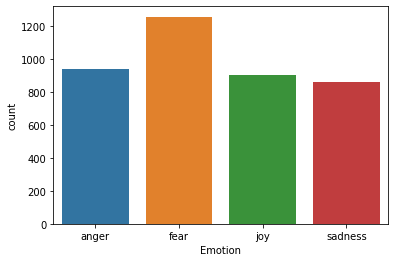

In [12]:
#checking imbalance or not
print(df["Emotion"].value_counts())
sns.countplot(df["Emotion"])

Text cleaning

In [13]:
#compile both patterns
compile1=re.compile(r"#\S+")
compile2=re.compile(r"@\S+")

In [14]:
#load english language from spacy library
nlp=spacy.load("en_core_web_sm")

In [15]:
#text preprocessing function
def text_preprocessing(sentence):
    #convert to lower case
    sentence_lower=sentence.lower()
    
    #remove mentions like--(# or @)
    sentence_without_mention=compile1.sub("",sentence_lower)
    sentence_without_mention=compile2.sub("",sentence_without_mention)
    
    #remove stop words
    sentence_without_stopwords=" ".join([i.text for i in nlp(sentence_without_mention) if not i.is_stop])
    #remove punctuation mark
    sentence_without_punct=" ".join([i.text for i in nlp(sentence_without_stopwords) if not i.is_punct])
    
    #replace urls
    sentence_without_url=preprocessing.replace.urls(sentence_without_punct," ")
    #replace numbers
    sentence_without_numbers=preprocessing.replace.numbers(sentence_without_url," ")
    #replace currancy symbols
    sentence_without_currency_symbol=preprocessing.replace.currency_symbols(sentence_without_numbers," ")
    #replace email
    sentence_without_email=preprocessing.replace.emails(sentence_without_currency_symbol," ")
    #remove html tags
    sentence_without_html_tag=preprocessing.remove.html_tags(sentence_without_email)
    #remove brackets
    sentence_without_brackets=preprocessing.remove.brackets(sentence_without_html_tag)
    
    #normalize the whitespaces
    sentence_normalized=preprocessing.normalize.whitespace(sentence_without_brackets)
    
    #take alphabetic characters
    sentence_with_alphabet=" ".join([i.text for i in nlp(sentence_normalized) if i.is_alpha])
    #take lemma or base word of the text
    sentence_lemma=" ".join([i.lemma_ for i in nlp(sentence_with_alphabet)])
    
    #return cleaned text
    return sentence_lemma

In [16]:
#anger sentence
sentence="How the fu*k! Who the heck! moved my fridge!... should I knock the landlord door. #angry #mad ##"
print("Original text : ",sentence)
print("Cleaned text : ",text_preprocessing(sentence))

Original text :  How the fu*k! Who the heck! moved my fridge!... should I knock the landlord door. #angry #mad ##
Cleaned text :  heck move fridge knock landlord door


In [17]:
#fear sentence
sentence="#panic Panic attack from fear of starting new medication"
print("Original text : ",sentence)
print("Cleaned text : ",text_preprocessing(sentence))

Original text :  #panic Panic attack from fear of starting new medication
Cleaned text :  panic attack fear start new medication


In [18]:
#joy sentence
sentence="@WSJNordics You make the world a more joyful place. #TheNiceBot"
print("Original text : ",sentence)
print("Cleaned text : ",text_preprocessing(sentence))

Original text :  @WSJNordics You make the world a more joyful place. #TheNiceBot
Cleaned text :  world joyful place


In [19]:
#sadness sentence
sentence="What a sad evening - clearing out all of Harvey's cage and belongings. Now so final. Goodbye my little man.... #depressing"
print("Original text : ",sentence)
print("Cleaned text : ",text_preprocessing(sentence))

Original text :  What a sad evening - clearing out all of Harvey's cage and belongings. Now so final. Goodbye my little man.... #depressing
Cleaned text :  sad evening clearing harvey cage belonging final goodbye little man


In [20]:
#top 5 records
df.head()

,Text,Emotion,Intensity
0,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,So my Indian Uber driver just called someone t...,anger,0.896
2,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,Don't join @BTCare they put the phone down on ...,anger,0.896


In [21]:
#clean the text data from the dataframe
df["Clean_Text"]=df["Text"].swifter.apply(lambda x:text_preprocessing(x))
df.head()

Pandas Apply:   0%|          | 0/3960 [00:00<?, ?it/s]

,Text,Emotion,Intensity,Clean_Text
0,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938,heck move fridge knock landlord door
1,So my Indian Uber driver just called someone t...,anger,0.896,indian uber driver call n word move vehicle jump
2,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896,ask parcel deliver pick store address
3,so ef whichever butt wipe pulled the fire alar...,anger,0.896,ef whichever butt wipe pull fire alarm davis b...
4,Don't join @BTCare they put the phone down on ...,anger,0.896,join phone talk rude take money acc willynilly


Word Cloud for seeing frequent words

In [22]:
#anger tweets
df_anger=df[df["Emotion"]=="anger"]
df_anger.head()

,Text,Emotion,Intensity,Clean_Text
0,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938,heck move fridge knock landlord door
1,So my Indian Uber driver just called someone t...,anger,0.896,indian uber driver call n word move vehicle jump
2,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896,ask parcel deliver pick store address
3,so ef whichever butt wipe pulled the fire alar...,anger,0.896,ef whichever butt wipe pull fire alarm davis b...
4,Don't join @BTCare they put the phone down on ...,anger,0.896,join phone talk rude take money acc willynilly


Text(0.5, 1.0, '50 Most Frequent Words in Clean_Text of Anger Emotion')

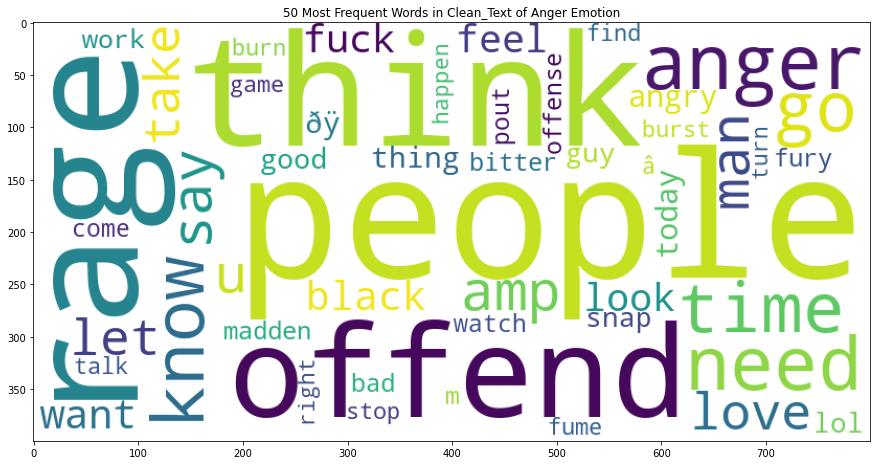

In [23]:
#WORDCLOUD to see frequent words
plt.figure(figsize=(15,15))
word_cloud=WordCloud(height=400,width=800,max_words=50,background_color="white").generate(" ".join(df_anger["Clean_Text"]))
plt.imshow(word_cloud)
plt.title("50 Most Frequent Words in Clean_Text of Anger Emotion")

In [24]:
#fear tweets
df_fear=df[df["Emotion"]=="fear"]
df_fear.head()

,Text,Emotion,Intensity,Clean_Text
941,I feel like I am drowning. #depression #anxiet...,fear,0.979,feel like drown
942,I get so nervous even thinking about talking t...,fear,0.979,nervous thinking talk wanna die
943,I lost my blinders .... #panic,fear,0.975,lose blinder
944,I feel like I am drowning. #depression #falur...,fear,0.938,feel like drown
945,This is the scariest American Horror Story out...,fear,0.938,scary american horror story go to watch daytime


Text(0.5, 1.0, '50 Most Frequent Words in Clean_Text of Fear Emotion')

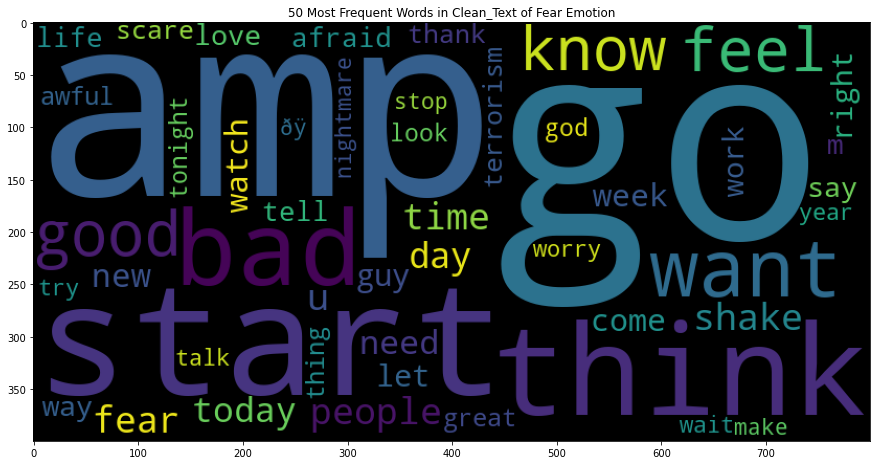

In [25]:
#WORDCLOUD to see frequent words
plt.figure(figsize=(15,15))
word_cloud=WordCloud(height=400,width=800,max_words=50,background_color="black").generate(" ".join(df_fear["Clean_Text"]))
plt.imshow(word_cloud)
plt.title("50 Most Frequent Words in Clean_Text of Fear Emotion")

In [26]:
#joy tweets
df_joy=df[df["Emotion"]=="joy"]
df_joy.head()

,Text,Emotion,Intensity,Clean_Text
2198,Just got back from seeing @GaryDelaney in Burs...,joy,0.980,got see burslem amazing face hurt laugh
2199,Oh dear an evening of absolute hilarity I don'...,joy,0.958,oh dear evening absolute hilarity think laugh ...
2200,Been waiting all week for this game â¤ï¸â¤ï...,joy,0.940,wait week game
2201,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,0.938,thank gloria sweet thoughtful day joyful love
2202,I feel so blessed to work with the family that...,joy,0.938,feel bless work family nanny love amp apprecia...


Text(0.5, 1.0, '50 Most Frequent Words in Clean_Text of Joy Emotion')

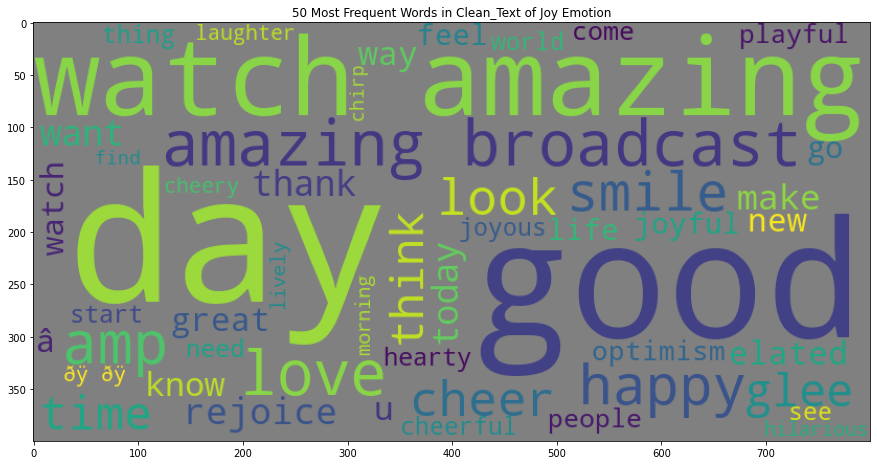

In [27]:
#WORDCLOUD to see frequent words
plt.figure(figsize=(15,15))
word_cloud=WordCloud(height=400,width=800,max_words=50,background_color="gray").generate(" ".join(df_joy["Clean_Text"]))
plt.imshow(word_cloud)
plt.title("50 Most Frequent Words in Clean_Text of Joy Emotion")

In [28]:
#joy tweets
df_sadness=df[df["Emotion"]=="sadness"]
df_sadness.head()

,Text,Emotion,Intensity,Clean_Text
3100,Depression sucks! #depression,sadness,0.958,depression suck
3101,Feeling worthless as always #depression,sadness,0.958,feel worthless
3102,Feeling worthless as always,sadness,0.958,feel worthless
3103,My #Fibromyalgia has been really bad lately wh...,sadness,0.946,bad lately good mental state feel overwhelmed
3104,Im think ima lay in bed all day and sulk. Life...,sadness,0.934,m think m lay bed day sulk life hit hard rn


Text(0.5, 1.0, '50 Most Frequent Words in Clean_Text of Sadness Emotion')

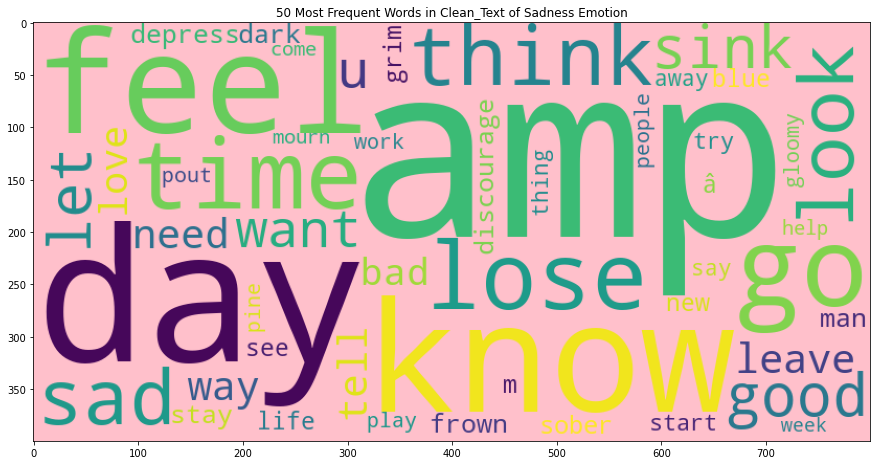

In [29]:
#WORDCLOUD to see frequent words
plt.figure(figsize=(15,15))
word_cloud=WordCloud(height=400,width=800,max_words=50,background_color="pink").generate(" ".join(df_sadness["Clean_Text"]))
plt.imshow(word_cloud)
plt.title("50 Most Frequent Words in Clean_Text of Sadness Emotion")

In [30]:
#save the cleaned text dataframe
df.to_csv("clean_text.csv",index=False)